<a href="https://colab.research.google.com/github/AvaM1/Math-of-Finance/blob/main/176_Final%20Review(all).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Betting
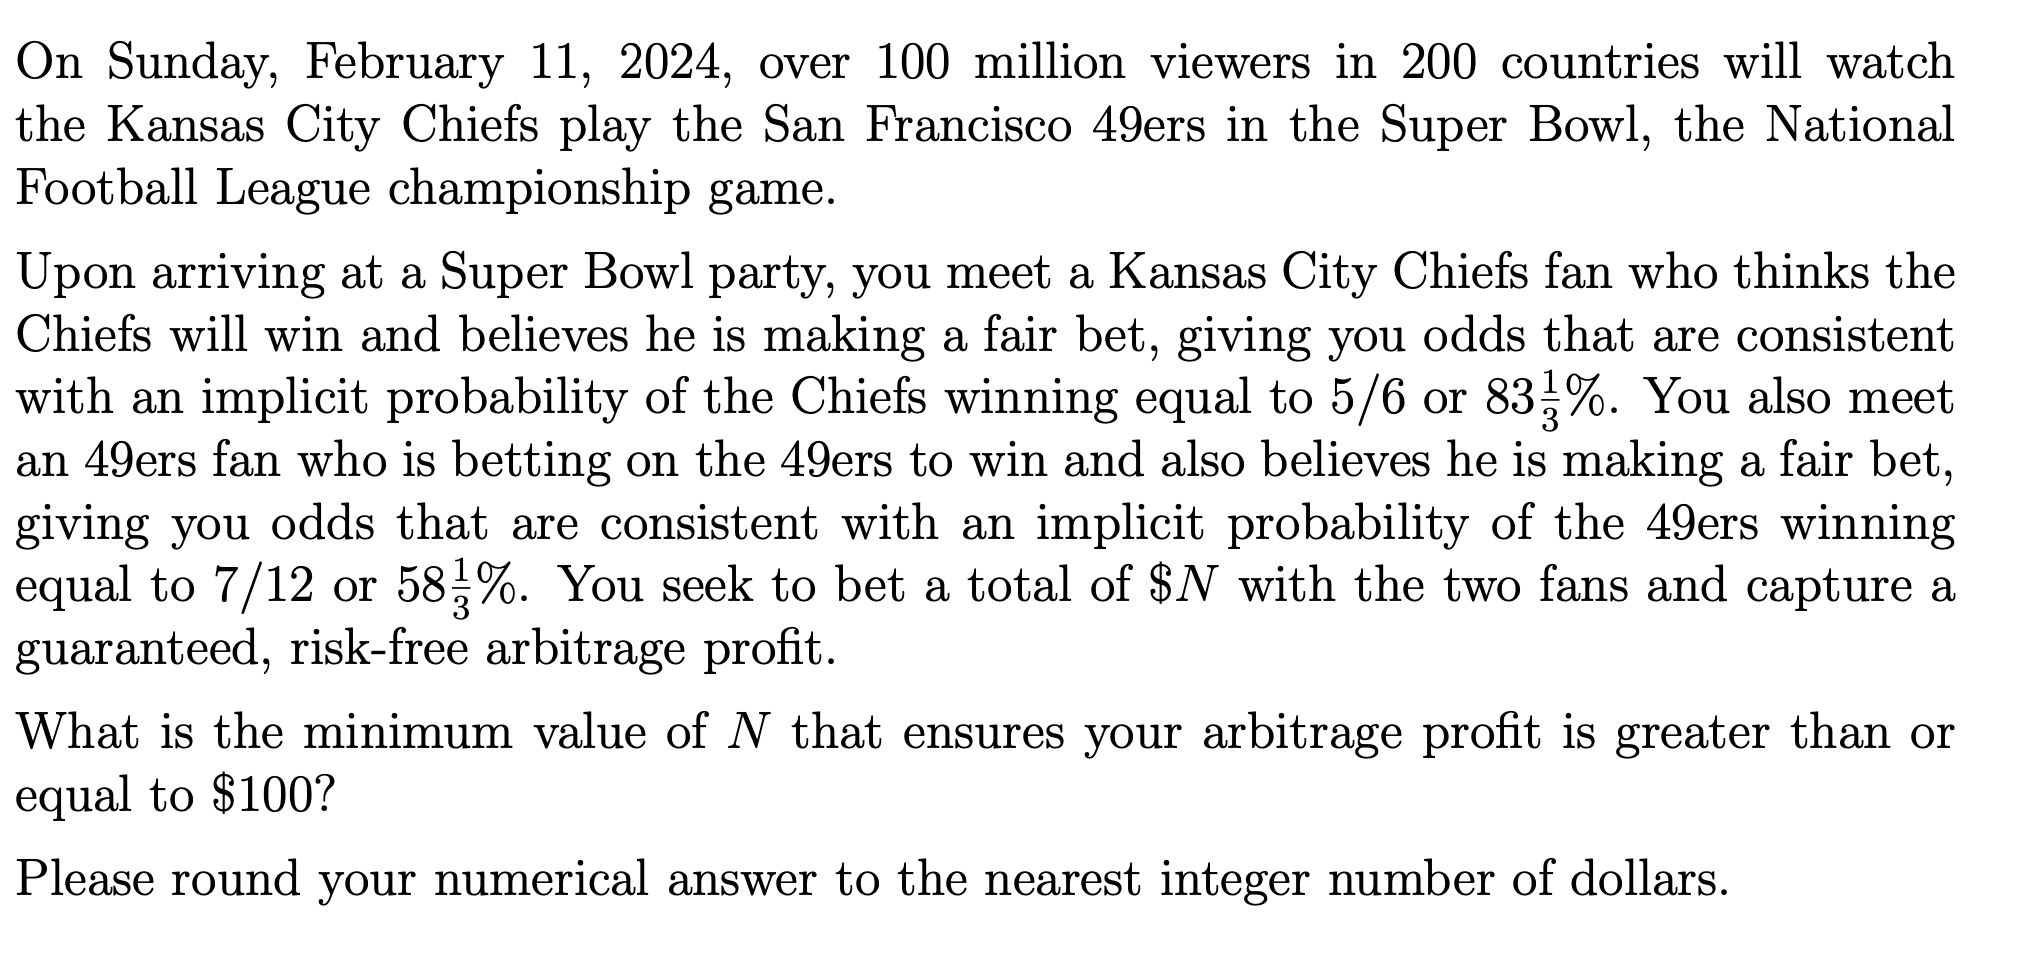

In [3]:
## Code Solution
n = 100
p_A_chiefs = 5/6
p_B_49ers = 7/12

#Calculate the odds for each bookmaker
o_A_49ers = p_A_chiefs/(1-p_A_chiefs)
o_B_chiefs = p_B_49ers/(1-p_B_49ers)


#Calculate the minimum and maximum bets for each bookmaker
x_min = n / (1+o_B_chiefs)
x_max = n*o_A_49ers / (1+o_A_49ers)

#calculate the optimal bet and the maximum guaranteed profit
x_star = n*(1+o_A_49ers) / (2+o_B_chiefs+o_A_49ers)
p_star = n*(o_B_chiefs*o_A_49ers-1) / (2+o_B_chiefs+o_A_49ers)

print(f"Minimum bet on Chiefs: ${x_min:.2f}")
print(f"Maximum bet on Chiefs: ${x_max:.2f}")
print(f"Optimal bet on 49ers with Bookmaker A: ${x_star:.2f}")
print(f"Optimal bet on Chiefs with Bookmaker B: ${n-x_star:.2f}")
print(f"Maximum guaranteed profit: ${p_star:.2f}")

Minimum bet on Chiefs: $41.67
Maximum bet on Chiefs: $83.33
Optimal bet on 49ers with Bookmaker A: $71.43
Optimal bet on Chiefs with Bookmaker B: $28.57
Maximum guaranteed profit: $71.43


# Normal Distribution
Defined by parameters: mean ( 𝜇 ), standard deviation ( 𝜎 )

PDF:  𝑓(𝑥|𝜇,𝜎2)=12𝜋𝜎2√exp(−(𝑥−𝜇)22𝜎2)

Symmetric around mean

Standard Normal:  𝑍∼𝑁(0,1) ,  𝑍=𝑋−𝜇𝜎

# Central Limit Theorem (CLT)


### Question:

A factory produces widgets that are packaged into boxes. The weights of the widgets are independent and identically distributed random variables with a mean of 50 grams and a standard deviation of 5 grams. Each box contains 100 widgets.

 The factory ships an order of 500 boxes. Using the Central Limit Theorem, estimate the probability that the total weight of the widgets in the 500 boxes is greater than 2,501 kilograms.



In [5]:
from scipy.stats import norm

mu = 50
n = 100 * 500
sigma = 5
x = 2501 * 1000

z_score = (x - n * mu) / (sigma * (n ** 0.5))
probability = 1 - norm.cdf(z_score)

print(f"The probability that the total weight is greater than 2,501 kg is: {probability:.4f}")

The probability that the total weight is greater than 2,501 kg is: 0.1855


# PutCall Parity
C = S - P + (K * e^(-r(T-t)))

chapter2.  
Mid1:Q8-9

In [9]:

**Black-Scholes Formula for a European Call and Put Optiont**

import numpy as np
# Given values
C = 5  # Price of the call option
P = 60  # Price of the put option
E = 200  # Strike price
S = 150  # Current stock price
r = 0  # Interest rate
T = 1  # Time to expiration in years

# Calculate the present value of the strike price
E_discounted = E * np.exp(-r * T)

# Calculate the left-hand side (LHS) and right-hand side (RHS) of the equation
LHS = C + E_discounted
RHS = P + S

# Determine if there is an arbitrage opportunity and suggest strategy
if LHS > RHS:
    # LHS is overpriced, sell the call, buy the put, and invest the strike price at risk-free rate
    arbitrage_amount = LHS - RHS
    strategy = f"Sell the call option for ${C:.2f}, buy the put option for ${P:.2f}, take out a loan of ${E_discounted:.2f}, buy the stock at ${S:.2f} "
elif LHS < RHS:
    # RHS is overpriced, buy the call, sell the put, and borrow the strike price at risk-free rate
    arbitrage_amount = RHS - LHS
    strategy = f"Buy the call option for ${C:.2f}, sell the put option for ${P:.2f}, sell (short) the stock at ${S:.2f}, invest ${E_discounted:.2f} in the risk free asset."
else:
    # No arbitrage opportunity exists
    arbitrage_amount = 0
    strategy = "No arbitrage opportunity is available."

print(f"Arbitrage opportunity of ${arbitrage_amount:.2f} exists.")
print("Strategy:", strategy)

Arbitrage opportunity of $5.00 exists.
Strategy: Buy the call option for $5.00, sell the put option for $60.00, sell (short) the stock at $150.00, invest $200.00 in the risk free asset.


In [2]:
import numpy as np

# Given values
S = 120  # Current stock price
K = 100  # Strike price
r = 0.10  # Interest rate
T_minus_t = 2/365  # Time to expiration in years (2 days)

# Put-Call Parity: C = S - P + (K * e^(-r(T-t)))
# Since we need to find a lower bound for C, we can omit the put price assuming P >= 0
# Therefore, C >= S - (K * e^(-r(T-t)))

# Calculate the exponential term
discount_factor = np.exp(-r * T_minus_t)

# Calculate the lower bound for the call option price
C_lower_bound = S - (K * discount_factor)

print(f" The lower bound on the value of the call option is ${C_lower_bound:.2f}")

 The lower bound on the value of the call option is $20.05


# Black Scholes Formula
Capter5&6
https://colab.research.google.com/github/AvaM1/Math-of-Finance/blob/main/Chapter_5_and_6.ipynb#scrollTo=pCSJi5fACQsW

# Tech:https://optioncreator.com/options-calculator


**Black-Scholes Formula for a European Call and Put Optiont**

The price of a European call option $C$ is given by:

$$ c(t) = S(t) \cdot N(d_1) - e^{-r(T-t)} X\cdot N(d_2) $$


Similarly, the price of a European put option $p(t)$ is given by:

$$ p(t) = e^{-r(T-t)} X \cdot N(-d_2) - S(t) \cdot N(-d_1) $$


where:

- $S(t)$: Stock price at time $t$
- $X$: Strike price of the option
- $T$: Time to expiration
- $r$: Risk-free interest rate
- $N(x)$: Cumulative distribution function of the standard normal distribution
- $d_1$ and $d_2$ are calculated as:

$$ d_1 = \frac{\ln(S(t) / X) + (r + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}} $$
$$ d_2 = d_1 - \sigma \sqrt{T-t} $$

- $\sigma$: Volatility (Standard Deviation) of the stock's returns


### Question:

A European call option on a non-dividend paying stock has a strike price of 50 and will expire in 6 months. The current stock price is $48, the annual risk-free interest rate is 5%, and the stock's annual volatility is 20%. Calculate the price of the call option using the Black-Scholes formula.

#### Given:

- Current stock price, $\$S(0)$ = $\$48$
- Strike price, $\$X = \$50$
- Time to expiration, $T = 0.5$ years
- Risk-free interest rate, $r = 0.05$
- Volatility, $\sigma = 0.20$



In [ ]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S0, X, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European call option.

    Parameters:
    S0 (float): Current stock price
    X (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock

    Returns:
    float: Price of the call option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    call_price = (S0 * norm.cdf(d1)) - (X * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_put(S0, X, T, r, sigma):
    """
    Calculate the Black-Scholes option price for a European put option.

    Parameters:
    S0 (float): Current stock price
    X (float): Strike price of the option
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock

    Returns:
    float: Price of the put option
    """
    # Calculate d1 and d2
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    # Calculate the call option price
    put_price = -(S0 * norm.cdf(-d1)) + (X * np.exp(-r * T) * norm.cdf(-d2))
    return put_price

# Given data
S0 = 50    # Current stock price
X = 50       # Strike price
T = 0.5      # Time to expiration in years
r = 0.01   # Risk-free interest rate
sigma = 0.10 # Volatility of the stock

# Calculate the call option price
call_option_price = black_scholes_call(S0, X, T, r, sigma)
put_option_price = black_scholes_put(S0, X, T, r, sigma)
call_option_price, put_option_price

## General Black Scholes PDE:


Here we do not assume our stock evolves according to a geometric brownian motion:   $ dS = \mu S dt + \sigma S_t dW_t $, but can be more generally:

  $$ dS = \mu(S_t, t) dt + \sigma(S_t, t) dW_t $$

1. **Portfolio Construction:**
   Construct a portfolio $\Pi$ consisting of one short option (put or call) and $\Delta$ units of the underlying asset:

   $$ \Pi = -V + \frac{dV}{dS} S $$

   where $V(S_t, t)$ is the option value, and $S$ is the asset price.

2. **Portfolio Dynamics:**
   The change in portfolio value over an infinitesimally small time $dt$ is:

   $$ d\Pi = -dV + \frac{dV}{dS} dS $$

3. **Option Price Dynamics:**
   By Ito's lemma, we have

   $$ dV = \left( \frac{\partial V}{\partial t} + \mu(S_t, t) \frac{\partial V}{\partial S} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma(S_t, t) \frac{\partial V}{\partial S} dW_t $$

4. **Asset Price Dynamics:**
   We assume underlying asset follows a diffusion process:
   $$ dS = \mu(S_t, t) dt + \sigma(S_t, t) dW_t $$


5. **Substituting and Simplifying:**
   Substitute $dV$  into $d\Pi$ and $\mu S dt + \sigma(S_t, t) dW_t$ for $dS$ leading to:

  $$
  d\Pi = -\left(\left( \frac{\partial V}{\partial t} + \mu(S_t, t) \frac{\partial V}{\partial S} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt + \sigma(S_t, t) \frac{\partial V}{\partial S} dW_t \right) + \frac{dV}{dS} (\mu(S_t, t)dt + \sigma(S_t, t) dW_t).
  $$
  
  Simplifying we get:

$$ d\Pi = \left( -\frac{\partial V}{\partial t}  - \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
   

6. **Risk Free Assumption**
Since all risk has vanished from our equation we assume
$$d\Pi =r\Pi  dt =r \left( -V + \frac{dV}{dS} S \right) dt$$
where $r$ is the risk free rate.

7. **Putting it all Together**
We have thus:
$$r \left( -V + \frac{dV}{dS} S \right) dt=\left( -\frac{\partial V}{\partial t}  - \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial S^2} \right) dt$$
and after simplifying, we get the General Black Scholes PDE:
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2(S_t, t)  \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$

Let
$ dS_t= \mu(S_t, t) dt +\sigma(S_t, t) dW_t. $ (A special case is geometric brownian motion, $dS_t= \mu \cdot S_t dt +\sigma\cdot S_t dW_t$)

## Ito's Lemma

Let $V(x,t) \in C^{2,1}$ (Twice Differentiable in x and once differentiable in t).

The $V(S_t, t)$ has the following dynamics:

$$ dV = \left( \frac{\partial V}{\partial t} + \mu(S_t, t) \frac{\partial V}{\partial x} + \frac{\sigma^2(S_t, t)}{2} \frac{\partial^2 V}{\partial x^2} \right) dt + \sigma(S_t, t) \frac{\partial V}{\partial x} dW_t $$

## General Black-Scholes PDE
Let $V(S_t, t)$ be the price of an option at time t. Then
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2(S_t, t)  \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$
Where:
- $V(S,t)$ is the option price as a function of stock price $S$ and time $t$.
- $\sigma$ is the volatility of the stock's returns.
- $r$ is the risk-free interest rate.

### Question: Butterfly Spread


Consider Apple (AAPL) stock as the underlying asset for constructing two option strategies: a Butterfly Spread using only call options and an Iron Butterfly  using both calls and puts. The time to expiration (T) for all options is 1 year.

### Given Data:

- Current AAPL Stock Price, $S(0)$: $150

- Risk-Free Interest Rate, $r$: 5% per annum
- Volatility of AAPL Stock, $\sigma$: 20% per annum
- Strike Prices for the Options:

  - Lower Strike Price, $X_L$: $145

  - Middle Strike Price, $X_M$: $150

  - Higher Strike Price, $X_H$: $155



####  Portfolio 1. Butterfly Spread Using Calls

Construct a Butterfly Spread by:
- Buying 1 Call Option at $X_L$
- Selling 2 Call Options at $X_M$
- Buying 1 Call Option at $X_H$


#### Portfolio 2. Iron Butterfly  Using Calls and Puts

Construct an Iron Butterfly by:
- Buying 1 Call Option at $X_H$
- Selling 1 Call Option at $X_M$
- Selling 1 Put Option at $X_M$
- Buying 1 Put Option at $X_L$


Calculate the cost of the two portfolios.




In [ ]:
from scipy.stats import norm
import numpy as np

def black_scholes_call(S0, X, T, r, sigma):
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S0 * norm.cdf(d1)) - (X * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_put(S0, X, T, r, sigma):
    d1 = (np.log(S0 / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = (X * np.exp(-r * T) * norm.cdf(-d2)) - (S0 * norm.cdf(-d1))
    return put_price

# Given data for AAPL option strategies
S0 = 150  # Current AAPL stock price
r = 0.05  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 1  # Time to expiration in years
X_L = 145  # Lower Strike Price
X_M = 150  # Middle Strike Price
X_H = 155  # Higher Strike Price

# Calculate the cost of Butterfly Spread using calls
butterfly_spread_cost = black_scholes_call(S0, X_L, T, r, sigma) - 2 * black_scholes_call(S0, X_M, T, r, sigma) + black_scholes_call(S0, X_H, T, r, sigma)

# Calculate the cost of Iron Butterfly using calls and puts
iron_butterfly_cost = black_scholes_call(S0, X_H, T, r, sigma) - black_scholes_call(S0, X_M, T, r, sigma) - black_scholes_put(S0, X_M, T, r, sigma) + black_scholes_put(S0, X_L, T, r, sigma)

print(f"The cost of the Butterfly Spread using calls is: {butterfly_spread_cost}")
print(f"The cost of the Iron Butterfly using calls and puts is: {iron_butterfly_cost}")



The cost of the Butterfly Spread using calls is: 0.31198708033896594
The cost of the Iron Butterfly using calls and puts is: -4.444160042164597


### Mid2-Question 9

Apple stock (ticker: AAPL) is currently trading at $180. Consider two different options portfolios for constructing a _butterfly spread_ on AAPL:

**Portfolio A, Long Butterfly Spread**
- Sell an at-the-money call option
- Sell an at-the-money put option
- Buy a put option with strike price $\$160$
- Buy a call option with strike price $\$200$

**Portfolio B, Long Butterfly Spread**
- Sell 2 at-the-money call options
- Buy a call option with strike price $\$160$
- Buy a call option with strike price $\$200$

All options are European and have an expiration date of 1 year. Assume the stock does not pay any dividends. Assume there is no arbitrage in the market and the Black-Scholes option pricing theory holds. The continuously compounded annual risk-free interest rate $r = 5\%$. The volatility $\sigma$ is unknown.

You decide to buy a butterfly spread using Portfolio B and sell a butterfly spread using Portfolio A: your position is $\Pi_B - \Pi_A$

Compute the value of the portfolio $\Pi_B - \Pi_A$ today. Please round your numerical answer to two decimal places.


### Solution to Question 9

Write Portfolio A  as:
$$ \Pi_A = -C_M - P_M + P_L + C_H $$

Write Portfolio B  as:
$$ \Pi_B = -2C_M + C_L + C_H $$

#### Combining Portfolios

The combined portfolio is $\Pi_B - \Pi_A$:
$$ \Pi_B - \Pi_A = (-2C_M + C_L + C_H) - (-C_M - P_M + P_L + C_H) $$

Simplifying this expression, we cancel out the terms that appear in both portfolios:

$$ \Pi_B - \Pi_A = -C_M + C_L + P_M - P_L $$

#### Using Put-Call Parity

Put-call parity for European options can be stated as:
$$ C_K - P_K = S_0 e^{-qT} - K e^{-rT} $$

Applying put-call parity, we see

$$ \Pi_B - \Pi_A = (S_0 - L e^{-rT}) - (S_0 - M e^{-rT}) $$

Putting in our values, we find:
$$ \Pi_B - \Pi_A = 20 \times e^{-0.05} \approx 19.02 $$


In [6]:
import math

# Given values
S_0 = 180  # Current stock price
L = 160    # Lower strike price
M = 180    # Middle strike price (ATM)
H = 200    # Higher strike price
r = 0.05   # Risk-free interest rate
T = 1      # Time to expiration in years

# Put-call parity: C - P = S_0 * exp(-q*T) - K * exp(-r*T)
# Since q=0 (no dividends), this simplifies to: C - P = S_0 - K * exp(-r*T)

# Compute the present value of the strikes L and M
PV_L = L * math.exp(-r * T)
PV_M = M * math.exp(-r * T)

# Using put-call parity, calculate the value of Pi_B - Pi_A
Pi_B_minus_Pi_A = (S_0 - PV_L) - (S_0 - PV_M)

print(f"The value of Pi_B - Pi_A is approximately: {Pi_B_minus_Pi_A:.2f}")


The value of Pi_B - Pi_A is approximately: 19.02


## The Greeks- $\Delta, \Gamma, \Theta, \nu, \rho$

# Tech:https://optioncreator.com/options-calculator


#### Delta ($\Delta=\frac{\partial V}{\partial S}$)

#### Gamma ($\Gamma=\frac{\partial^2 V}{\partial S^2}$)

#### Theta ($\Theta=-\frac{\partial V}{\partial \tau} $) $(\tau:=T-t)$
#### Vega ($\nu=\frac{\partial V}{\partial \sigma}$)
#### Rho ($\rho=\frac{\partial V}{\partial r}$)



In [ ]:
from scipy.stats import norm
import numpy as np

def european_call_price_and_greeks(S, X, T, r, sigma):
    """
    Calculate the price and Greeks for a European call option.

    Parameters:
    S (float): Current stock price
    X (float): Strike price
    T (float): Time to expiration in years
    r (float): Risk-free interest rate
    sigma (float): Volatility of the stock

    Returns:
    tuple: Option price, Delta, Gamma, Theta, Vega, Rho
    """
    # Calculate d1 and d2
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate the price of the call option
    price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)

    # Calculate Greeks
    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * X * np.exp(-r * T) * norm.cdf(d2)
    vega = S * np.sqrt(T) * norm.pdf(d1)
    rho = T * X * np.exp(-r * T) * norm.cdf(d2)

    return price, delta, gamma, theta, vega, rho

# Example usage
S0 = 100  # Current stock price
X = 100   # Strike price
T = 1    # Time to expiration (1 year)
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility of the stock

price, delta, gamma, theta, vega, rho = european_call_price_and_greeks(S0, X, T, r, sigma)
print(f"Call Price: {price:.2f}, Delta: {delta:.2f}, Gamma: {gamma:.2f}, Theta: {theta:.2f}, Vega: {vega:.2f}, Rho: {rho:.2f}")


Call Price: 10.45, Delta: 0.64, Gamma: 0.02, Theta: -6.41, Vega: 37.52, Rho: 53.23


### Question: Butterfly Spread -$\Delta, \Gamma, \Theta, \nu, \rho$.

Plato constructs a Butterfly Spread using European call options on Apple Inc. (AAPL).

#### Portfolio Setup:
- **Long Calls**: 10 AAPL call options, strike $\$140$, 6 months to expiration.
- **Short Calls**: 20 AAPL call options, strike $\$150$, 6 months to expiration.
- **Long Calls**: 10 AAPL call options, strike $\$160$, 6 months to expiration.

AAPL current price: $\$145$, annual volatility: 25%, risk-free rate: 3%, no dividends.
 For each position, calculate $\Delta, \Gamma, \Theta, \nu, \rho$.




https://colab.research.google.com/github/AvaM1/Math-of-Finance/blob/main/Chapter_7.ipynb#scrollTo=mcok2bPQHboD&line=2&uniqifier=1

In [ ]:
# Portfolio parameters
S = 145  # Current AAPL stock price
T = 0.5  # Time to expiration in years (6 months)
r = 0.03  # Risk-free interest rate
sigma = 0.25  # Volatility
strikes = [140, 150, 160]  # Strike prices
quantities = [10, -20, 10]  # Quantities for each strike price position

# Initialize net Greeks
net_price, net_delta, net_gamma, net_theta, net_vega, net_rho = 0, 0, 0, 0, 0, 0

# Calculate and sum Greeks for the entire portfolio
for X, quantity in zip(strikes, quantities):
    price, delta, gamma, theta, vega, rho = european_call_price_and_greeks(S, X, T, r, sigma)
    net_price += price * quantity
    net_delta += delta * quantity
    net_gamma += gamma * quantity
    net_theta += theta * quantity
    net_vega += vega * quantity
    net_rho += rho * quantity

print(f"Net Portfolio Greeks:")
print(f"Net Price: {net_price:.2f}")
print(f"Net Delta: {net_delta:.2f}")
print(f"Net Gamma: {net_gamma:.2e}")
print(f"Net Theta: {net_theta:.2f}")
print(f"Net Vega: {net_vega:.2f}")
print(f"Net Rho: {net_rho:.2f}")

Net Portfolio Greeks:
Net Price: 14.40
Net Delta: 0.10
Net Gamma: -2.14e-02
Net Theta: 14.03
Net Vega: -56.19
Net Rho: 0.32


# Distribution of GBM

For geometric browian motion $$ dX_t = \mu X_t dt + \sigma X_t dW_t, $$ we have  has the distribution of a log-normal pdf with parameters $\mu_1$ and $\sigma^2_1$ at time $T$ given $X(t)$
$$ f_{X_T}(x) = \frac{1}{x \sigma_1 \sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu_1)^2}{2\sigma_1^2}} $$

where
$$\mu_1=\ln[X(t)]+(\mu-\frac{1}{2}\sigma^2)(T-t)$$
and
$$\sigma_1^2=\sigma^2(T-t)$$

The mode of the log-normal distribution (Most likely value):

$$ x = e^{\mu_1 - \sigma_1^2} $$

### Q8 Most Likely Value at Expiration

In this problem, we assume the stock price $S(t)$ follows Geometric Brownian Motion described by the following stochastic differential equation:

$$
dS = \mu S dt + \sigma S dW,
$$

where $dW$ is the standard Wiener process and $\mu = 0.13$ and $\sigma = 0.20$ are constants. The current stock price is $100 and the stock pays no dividends.

Consider an at-the-money European call option on this stock with 1 year to expiration. What is the most likely value of the stock price at expiration? Please round your numerical answer to 2 decimal places.


Answer:
Most Likely Value at Expiration

The mode of the log-normal distribution, which represents the most likely value of the stock price at expiration, is given by:

$$
x = e^{\mu_1 - \sigma_1^2}
$$

Substituting $\mu_1$ and $\sigma_1^2$ into this formula gives:

$$
x = e^{\ln[100] + \left(0.13 - \frac{1}{2}(0.20)^2\right)(1) - (0.20)^2(1)}\approx 107.25
$$

In [11]:
import numpy as np

# Given parameters for GBM
S_0 = 100  # Current stock price
mu = 0.13  # Drift coefficient
sigma = 0.20  # Volatility coefficient
t = 1  # Time to expiration in years

# Calculate the mode of the log-normal distribution
mode = np.exp(np.log(S_0) + (mu - 0.5 * sigma**2) * t - sigma**2 * t)

# Round to 2 decimal places
mode_rounded = round(mode, 2)

print(f"The most likely stock price at expiration is: {mode_rounded}")


The most likely stock price at expiration is: 107.25


In [ ]:
#Calculates CDF of log normal distribution

import numpy as np
from scipy.stats import norm

def gbm_lognormal_cdf(x, X_t, mu, sigma, T_minus_t):
    """
    Calculate the cumulative distribution function (CDF) of a log-normal variable
    for a geometric Brownian motion (GBM) process at a future time.

    Parameters:
    x (float or array-like): The value(s) at which to evaluate the CDF.
    X_t (float): The value of the process at time t.
    mu (float): Drift coefficient of the GBM process.
    sigma (float): Volatility coefficient of the GBM process.
    T_minus_t (float): Time difference between the future time T and the current time t.

    Returns:
    float or array-like: The CDF value(s) at the given x.
    """
    # Calculate the updated parameters for the log-normal distribution
    mu_1 = np.log(X_t) + (mu - 0.5 * sigma**2) * T_minus_t
    sigma_1 = sigma * np.sqrt(T_minus_t)

    # Calculate the CDF of the log-normal variable
    cdf = norm.cdf(np.log(x), loc=mu_1, scale=sigma_1)

    return cdf

# Example usage
X_t = 110  # Value of the process at time t
mu = 1/8  # Drift coefficient
sigma = 1/2  # Volatility coefficient
T_minus_t = 4  # One year difference

x = np.array([100])  # Values at which to evaluate the CDF

cdf_values = gbm_lognormal_cdf(x, X_t, mu, sigma, T_minus_t)
print("CDF values:", cdf_values)

CDF values: [0.46203423 0.53796577]


# Implied Volatility
Chapter9 https://colab.research.google.com/github/AvaM1/Math-of-Finance/blob/main/Chapter_9.ipynb#scrollTo=HcmxI-bCJrQg&line=1&uniqifier=1

# Tech: https://www.option-price.com/implied-volatility.php

## Volatility Smile


The implied volatility $\sigma_{imp}$ is calculated by inverting the Black-Scholes formula:

$$
\sigma_{imp} = BS^{-1}(S_0, K, r, T, C)
$$

where $S_0$ is the current asset price, $K$ is the strike price, $r$ is the risk-free rate, $T$ is the time to expiration, and $C$ is the market price of the option.

#### Volatility Smile Pattern

The volatility smile refers to the observed pattern of implied volatilities $\sigma_{imp}$ across different strike prices $K$ for options with the same underlying asset and expiration date $T$.

$$
\sigma_{imp} = f(K)
$$

This pattern forms a smile-shaped curve when plotted against the strike price.

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import newton

# Black-Scholes formula for European call option
def call_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes formula for European put option
def put_option_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Objective function to find the root (implied volatility)
def implied_volatility_objective(sigma, S, K, T, r, market_price, option_type='call'):
    if option_type == 'call':
        return call_option_price(S, K, T, r, sigma) - market_price
    elif option_type == 'put':
        return put_option_price(S, K, T, r, sigma) - market_price

# Function to calculate implied volatility
def calculate_implied_volatility(S, K, T, r, market_price, option_type='call'):
    # Initial guess for volatility
    sigma_initial_guess = 0.2
    # Use Newton-Raphson method to find the root of the objective function
    implied_vol = newton(implied_volatility_objective, sigma_initial_guess, args=(S, K, T, r, market_price, option_type))
    return implied_vol

# Example usage:
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05 # Risk-free interest rate
market_price = 10  # Market price of the option

# Calculate implied volatility for a call option
implied_vol_call = calculate_implied_volatility(S, K, T, r, market_price, option_type='call')
print(f"Implied Volatility for Call Option: {implied_vol_call:.6f}")

# Calculate implied volatility for a put option
implied_vol_put = calculate_implied_volatility(S, K, T, r, market_price, option_type='put')
print(f"Implied Volatility for Put Option: {implied_vol_put:.6f}")


Implied Volatility for Call Option: 0.187972
Implied Volatility for Put Option: 0.317019



#Realized Volatility

Given historical stock prices $S(n)$ for $N+1$ days, we can estimate daily returns $R_n$ as:

$$ R_n = \frac{S(n) - S(n - 1)}{S(n - 1)} $$

Then, we compute the daily mean return $\hat{\mu}_d$ and daily volatility $\hat{\sigma}_d$:

$$ \hat{\mu}_d = \frac{1}{N} \sum_{n=1}^{N} \ln(1 + R_n) $$
$$ \hat{\sigma}_d = \sqrt{\frac{1}{N - 1} \sum_{n=1}^{N} (\ln(1 + R_n) - \hat{\mu}_d)^2} $$

To annualize these estimates, assuming 252 trading days in a year, the formulas are:

$$ \hat{\mu} = 252 \hat{\mu}_d $$
$$ \hat{\sigma} = \hat{\sigma}_d \sqrt{252} $$



In [ ]:
# Calculate annualized volatility
import numpy as np

def calculate_realized_volatility(prices):
    # Calculate daily returns
    daily_returns = (prices[1:] / prices[:-1]) - 1

    # Calculate the daily mean return
    daily_mean_return = np.mean(np.log(1 + daily_returns))
    print(daily_mean_return*252)

    # Calculate the daily volatility
    variance = sum((np.log(1 + r) - daily_mean_return) ** 2 for r in daily_returns) / (len(daily_returns) - 1)
    daily_volatility=np.sqrt(variance)

    # Annualize the volatility
    annualized_volatility = daily_volatility * np.sqrt(252)

    return annualized_volatility

# Sample data: AAPL historical adjusted closing prices
data = np.array([150.00, 152.30, 153.20, 151.80, 152.50, 150.70, 151.25, 152.80, 153.75, 155.00])

# Call the function and print the result
realized_volatility = calculate_realized_volatility(data)
print(f"The realized annualized volatility is: {realized_volatility:.2%}")

0.9181150390437428
The realized annualized volatility is: 13.91%


# Dividends in the Black-Scholes Model
- The original Black-Scholes model assumes that the underlying asset pays no dividends
- However, many stocks pay dividends, which affects the price of the options
- Dividends are typically paid out of the company's earnings and distributed to shareholders
- When a stock pays a dividend, its price usually drops by the amount of the dividend on the ex-dividend date
- To account for dividends in the Black-Scholes model, we need to modify the formula

## Black-Scholes Formula with Dividends
The Black-Scholes formula for a European call option with dividends is given by:

$c(t) = S(t)e^{-q(T-t)} \cdot N(d_1) - Xe^{-r(T-t)} \cdot N(d_2)$

where:
- $q$: Continuous dividend yield (assumed to be constant)
- All other variables are the same as in the original Black-Scholes formula

The formula for a European put option with dividends is:

$p(t) = Xe^{-r(T-t)} \cdot N(-d_2) - S(t)e^{-q(T-t)} \cdot N(-d_1)$

The modified $d_1$ and $d_2$ are calculated as:

$d_1 = \frac{\ln(\frac{S(t)}{X}) + (r - q + \frac{\sigma^2}{2})(T-t)}{\sigma \sqrt{T-t}}$

$d_2 = d_1 - \sigma \sqrt{T-t}$

## Interpretation
- The dividend yield $q$ reduces the stock price growth rate, as the dividends are paid out of the company's earnings
- The term $e^{-q(T-t)}$ adjusts the current stock price $S(t)$ to account for the expected dividends paid during the option's lifetime
- As the dividend yield increases, the call option price decreases, and the put option price increases, all else being equal

In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_dividend(call_put, S, X, T, r, q, sigma):
    """
    Calculates the price of a European call or put option with dividends using the Black-Scholes model.

    Parameters:
    call_put (str): 'call' or 'put'
    S (float): Current stock price
    X (float): Strike price
    T (float): Time to expiration (in years)
    r (float): Risk-free interest rate (continuous compounding)
    q (float): Dividend yield (continuous compounding)
    sigma (float): Volatility of the stock's returns

    Returns:
    float: Price of the option
    """

    d1 = (np.log(S / X) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if call_put == 'call':
        price = S * np.exp(-q * T) * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    elif call_put == 'put':
        price = X * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    else:
        raise ValueError("call_put must be either 'call' or 'put'")

    return price

# Example usage
call_price = black_scholes_dividend('call', 100, 100, 1, 0.05, 0.02, 0.2)
put_price = black_scholes_dividend('put', 100, 100, 1, 0.05, 0.02, 0.2)

print(f"Call price: {call_price:.2f}")
print(f"Put price: {put_price:.2f}")

Call price: 9.23
Put price: 6.33
